**Assignment-4**

**Name**- Prashant Singh

**Enrollment No.**- SAU/CS/Mtech(CS)/2024/04

**Course**- Data Mining

**Question**:

Implement K-nearest neighbors Algorithm

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [65]:
iris = datasets.load_iris()
X = iris.data[:, :4]
y = iris.target

**Scaling the Features**

* As KNN is dependent on distance calculation so scaling the features will ensure that features with large scales will not dominate the calculations.

In [66]:
def min_max_scaling(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    return (X - X_min) / (X_max - X_min)
X_scaled = min_max_scaling(X)

print(f"Features After Scaling:{X_scaled}")

Features After Scaling:[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.

**Implementation of KNN**

In [67]:
def euclidean_distance(X, Y):
    return np.sqrt(np.sum((X - Y) ** 2))

In [68]:
def K_neighbors(train_set, train_labels, test_instance, k):
    distances = []
    for i in range(len(train_set)):
        dist = euclidean_distance(test_instance, train_set[i])
        distances.append((train_set[i], dist, train_labels[i]))
    distances.sort(key=lambda x: x[1])
    return [distances[i][2] for i in range(k)]

In [69]:
def get_response(neighbors):
    return Counter(neighbors).most_common(1)[0][0]

def knn_predict(train_set, train_labels, test_instance, k):
    neighbor_labels = K_neighbors(train_set, train_labels, test_instance, k)
    return get_response(neighbor_labels)


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=4)
k = 3

predictions = [knn_predict(X_train, y_train, test_instance, k) for test_instance in X_test]

accuracy = sum(1 for true, pred in zip(y_test, predictions) if true == pred) / len(y_test) * 100.0

print("Predicted Labels:", predictions)
print("Actual Labels:   ", y_test.tolist())
print(f'Accuracy: {accuracy:.2f}%')


Predicted Labels: [2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0, 2]
Actual Labels:    [2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0, 2]
Accuracy: 95.56%


**Plotting the Results**

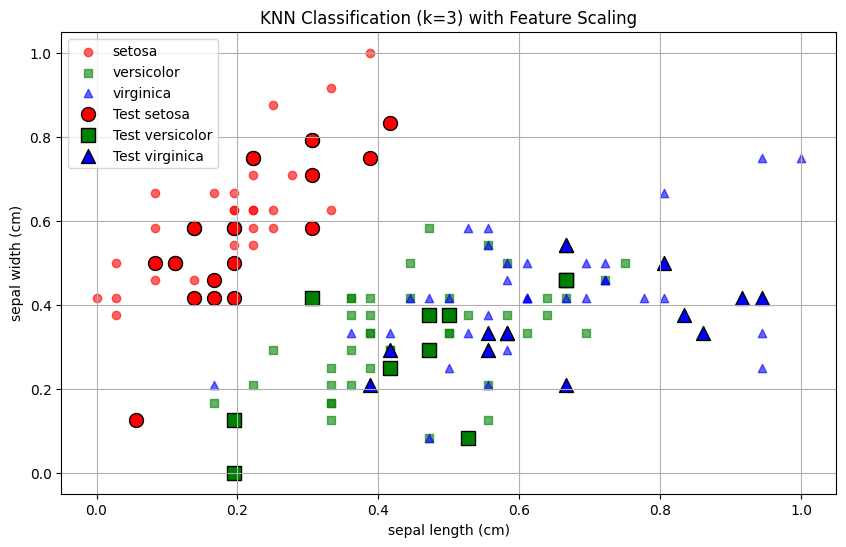

In [71]:
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']

#Predict Points
for i in range(len(colors)):
    plt.scatter(X_train[y_train == i][:, 0], X_train[y_train == i][:, 1],
                color=colors[i], marker=markers[i], label=iris.target_names[i], alpha=0.6)
#Test Points
for i in range(len(colors)):
    plt.scatter(X_test[y_test == i][:, 0], X_test[y_test == i][:, 1],
                edgecolor='black', color=colors[i], marker=markers[i],
                label=f'Test {iris.target_names[i]}', s=100)

plt.title(f'KNN Classification (k={k}) with Feature Scaling')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.grid()
plt.show()